<a href="https://colab.research.google.com/github/venushagan/vhagan_225a/blob/main/pandas_practice_bms225a_fresh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing pandas
import pandas as pd

# 1. Loading a csv file with Pandas

We'll start by reading the `patient_data.csv` file. This dataset contains the following patient information (adapted from: `https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas/data`):

- `patient_id`: unique id of the patient
- `age`: the age of the patient (in days!)
- `gender`: Male/Female
- `height`: measured height in cm
- `weight`: patient weight in kg
- `smoke` : smoking or not
- `alco` :  drinks alcohol or not
- `active`: physically active or not

---

> Reading and Writing Data
Reading data means bringing it into Python from a file, such as CSV. Pandas provides a very convenient way to do this using the `read_csv()` function. After making changes to our data, we often want to save it back to a file. We can use the `to_csv()` function to write a DataFrame to a CSV file.

In [ ]:
# Reading the patient data from the CSV file into a dataframe
patient_data = pd.read_csv('patient_data.csv')

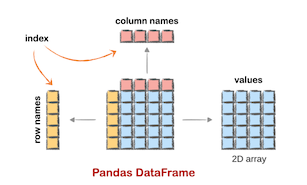

#### inspecting the dataframe

In [ ]:
# Displaying the first few rows to understand the structure of the dataset
# This is useful for a quick overview of what kind of data we're working with
patient_data.head()

In [ ]:
# Finding out how many rows (patients) are in the dataset
# The len() function here tells us the number of rows (each row represents a patient)
len(patient_data)

In [ ]:
# Alternatively, we can use the .shape attribute to see both rows and columns
patient_data.shape

In [ ]:
# Displaying the data types for each column
# Helps to understand what kind of data we are dealing with in each column
patient_data.dtypes

> The `object` data type is a general-purpose data type used to store data that doesn't fit into the typical numeric types (`int`, `float`) or other more specific types (`bool`, `datetime`, etc.). It's commonly used for text but can also hold mixed types, like numbers and strings.


In [ ]:
# Listing the column names of the DataFrame
# Columns act as labels for the data, indicating what kind of information each column contains
patient_data.columns

In [ ]:
# Listing the row indexes; by default, pandas creates an index starting at 0
patient_data.index

In [ ]:
# Setting 'height' as the index of the DataFrame (for demonstration purposes)
# Note that this does not change the DataFrame unless assigned
patient_data.set_index('height')

In [ ]:
# To actually change the DataFrame, we need to assign it to itself or another variable
patient_data = patient_data.set_index('patient_id')
patient_data.head()

In [ ]:
# Resetting the index to the default numeric one
# The inplace=True parameter updates the DataFrame directly
patient_data.reset_index(inplace=True)
patient_data.head()

In [ ]:
# Viewing a specific column - returns a pandas Series
# A Series is similar to a DataFrame, but it only has one column
patient_data['height']

In [ ]:
# Getting basic statistics for a numerical column such as mean, standard deviation, etc.
patient_data['height'].describe()

In [ ]:
# We can also count occurences of values in a column for understanding the distribution of categorical data
# Below, we are counting the number of occurrences of each value in the 'gender' column
patient_data['gender'].value_counts()

#### basic column operations

In [ ]:
# Lets make everyone a little bit taller by adding 0.1 to the height column : )
# Note: This operation does not update the DataFrame unless reassigned
patient_data['height'] + 0.1

In [ ]:
# Verifying that this did not update the dataframe
patient_data['height'].head()

In [ ]:
# To make the changes permanent, we need to assign the updated values back to the DataFrame
patient_data['height'] = patient_data['height'] + 0.1
patient_data['height'].head()

In [ ]:
# Removing the 'height' column
# Deleting columns is useful for cleaning up datasets and removing unneeded data
del patient_data['height']
patient_data.head()

#### writing a csv file to disk

In [ ]:
# Writing the updated DataFrame to a new CSV file
# The index=False parameter prevents pandas from writing the row index to the CSV file
patient_data.to_csv('patient_data_no_height.csv', index=False) # notice that this appeared in the Files tab.

In [ ]:
# Lets reload the original data and move on to the next section
patient_data = pd.read_csv('patient_data.csv')
patient_data.head()

# 2. Indexing, Subsetting, and Creating Columns

In this section, we'll learn how to:
1. Access specific rows and columns from our data (indexing).
2. Create subsets of the data to focus on particular participants or attributes.
3. Create new columns, which is often needed for calculations or adding more information.

Let's start by selecting some specific information from our datasets.


In [ ]:
# Creating a subset of the data with specific columns - 'age' and 'gender'
# This is useful for focusing on a specific set of features in the data
age_gender = patient_data[['age', 'gender']]
age_gender.head()

In [ ]:
# Selecting specific rows by index
# This helps in narrowing down to particular records in the dataset
subset_data = patient_data.iloc[:7]  # e.g., selecting the first 7 rows
subset_data

In [ ]:
# Selecting a specific row by its index
# Note: Index is zero-based, so row 3 is actually the fourth row
patient_data.iloc[3]

#### Creating Subsets Based on Conditions

We can also subset the data based on certain conditions, such as:
- Filtering patients by gender.
- Filtering patients with certain attributes like weight or height.


In [ ]:
# Selecting only male patients
patient_data[patient_data['gender'] == 'Male']

In [ ]:
# Selecting patients with weight greater than 180
patient_data[patient_data['weight'] > 180]

In [ ]:
# Selecting patients with weight greater than 180 and height greater than 185
patient_data[(patient_data['weight'] > 180) & (patient_data['height'] > 185)]

In [ ]:
# Creating a backup of the patient data before making further changes
patient_data_backup = patient_data.copy()

In [ ]:
# If needed, we can restore from the above copy by using:
# patient_data = patient_data_backup.copy()

#### Creating New Columns

Often we need to create new columns for further analysis.


In [ ]:
# age is given in days -- Let's convert to years!
patient_data['age']/365

In [ ]:
# actually lets update the age column in the dataframe
# One has to be careful when doing this (re-running this cell will keep updating the age)
patient_data['age'] = (patient_data['age']/365).round(1) # round to one decimal place
patient_data.head()

In [ ]:
# Creating a new column for BMI (Body Mass Index)
# BMI = weight (kg) / (height (m)^2)
patient_data['BMI'] = patient_data['weight'] / ((patient_data['height'] / 100) ** 2)

# Viewing only the relevant columns
patient_data[['height', 'weight', 'BMI']].head()

In [ ]:
# Calculating the average BMI in the dataset
patient_data['BMI'].mean()  # We can also use .median(), .max(), .min(), or .quantile(.95)

In [ ]:
# Getting more descriptive statistics on the BMI column
patient_data['BMI'].describe()

# 3. Groupby, Pivot, and Unstack

Grouping, pivoting, and melting are used to summarize or reshape our data.

- **Groupby** is used to group data and perform calculations (e.g., finding averages).
- **Pivot** rearranges data for better understanding.
- **Unstack** or **Melt** can help convert wide data to long data, which is sometimes easier for analysis.

---

### Groupby example:
![](https://pandas.pydata.org/docs/_images/06_groupby.svg)

In [ ]:
patient_data.head()

In [ ]:
# Groupby example: Average BMI by gender
bmi_by_gender = patient_data.groupby('gender')['BMI'].mean()
bmi_by_gender

In [ ]:
# Groupby example: Average BMI by gender
patient_data.groupby('gender')['smoke'].mean()

### Pivot Example:
![](https://pandas.pydata.org/docs/_images/07_pivot.svg)



- The `pivot_table()` function combines the functionality of pivoting and grouping.

In [ ]:
patient_data.head()

In [ ]:
# Creating a pivot table to show average BMI based on gender and activity level
bmi_table = patient_data.pivot_table(
                            values="BMI",
                            index="gender",
                            columns="active",
                            aggfunc="mean",
                        )

In [ ]:
bmi_table

### Melt/Unstack Example
The unstack function can be used to transform the above pivoted table back into long format.


In [ ]:
# Transforming the pivoted table back to long format
bmi_long = bmi_table.unstack()
bmi_long

### pivot and melt example (advanced)

In [ ]:
# for this example lets focus only on patient_id and age
patient_data_this_year = patient_data[['patient_id', 'age']].copy()

# add a year column
patient_data_this_year['year'] = 2024
# reorder the columns
patient_data_this_year = patient_data_this_year[['patient_id', 'year', 'age']]


# pretend we had data from last year
patient_data_last_year = patient_data_this_year.copy()
patient_data_last_year['age'] = patient_data_last_year['age'] - 1
patient_data_last_year['year'] = 2023

# concatenate the two dataframes
patient_data_both_years = pd.concat([patient_data_this_year,patient_data_last_year])

In [ ]:
patient_data_both_years

In [ ]:
# sorting based on 'patient_id' to show the structure of the new data
patient_data_both_years.sort_values('patient_id').head(6)

In [ ]:
# Pivot example:
patient_age_per_year = patient_data_both_years.pivot(index='patient_id', columns='year', values='age')
patient_age_per_year.head()

In [ ]:
## melt is the opposite of pivot
pd.melt(patient_age_per_year)

In [ ]:
# assign a name to the value (used to be 'age' before the pivot but we can rename it)
# also don't ignore the index if we want to keep patient ids
pd.melt(patient_age_per_year,value_name='patient_age',ignore_index=False)

# 4. Combining Data with Join and Merge

In some instances, we may need to combine multiple datasets. This can be done using:
- **Join**: Usually used when we want to combine datasets that share a common index.
- **Merge**: Used for combining datasets based on common columns.
---

Let's load the `heart data.csv` file and merge it with `patient_data` to create a more complete dataset.


#### merge

In [ ]:
# Reading the data
heart_data = pd.read_csv('heart_data.csv')
heart_data.head()

> We notice:
- There are missing values (`NaN`).
- Column names don't match (`id` should be `patient_id`).

Let's fix these issues before moving on.

In [ ]:
# Dropping any rows that contain NaN values (see also the .filna() function)
heart_data = heart_data.dropna()
heart_data.head()

In [ ]:
# Renaming 'id' column in heart_data to match with patient_data for merging
heart_data.rename(columns={'id': 'patient_id'}, inplace=True)
heart_data.head()

In [ ]:
# Merging the two datasets on 'patient_id'
# how=inner means that the intersection of the patient ids from both datasets will be kept
patient_heart_data = patient_data.merge(heart_data, on='patient_id', how='inner')

In [ ]:
# Saving the merged dataset
patient_heart_data.to_csv('patient_heart_data.csv')

### Joining on Index

The join function merges datasets based on their index. This can have unexpected results if the indices overlap but are not representing the same thing in the two dataframes

In [ ]:
# Setting the index to 'patient_id' for both dataframes
patient_data.set_index('patient_id', inplace=True)
heart_data.set_index('patient_id', inplace=True)

In [ ]:
# Joining the dataframes using their index
# This should yield similar results as merging
patient_data.join(heart_data, how='inner')

# 5. Manipulating Text Data

Working with text data often involves replacing or extracting information from strings. Let's see some examples.


In [ ]:
# Here we will work with the combined data:
patient_heart_data.head()

In [ ]:
# Changing the case of the 'gender' column to uppercase
patient_heart_data['gender'] = patient_heart_data['gender'].str.upper() # .lower()
patient_heart_data.head()

In [ ]:
# keeping only the first letter of the gender values
patient_heart_data['gender'] = patient_heart_data['gender'].str[:1] # or str[0]
patient_heart_data.head()

In [ ]:
# Converting 'patient_id' to string for demonstrating text operations
patient_heart_data['patient_id'] = patient_heart_data['patient_id'].astype(str)

In [ ]:
# Finding patients whose ID starts with '7'
id_starts_with_7 = patient_heart_data['patient_id'].str.startswith('7')
patient_heart_data[id_starts_with_7]

In [ ]:
# Finding patients whose IDs contain '3855'
selector = patient_heart_data['patient_id'].str.contains('3855')
patient_heart_data[selector]

# Extra: pandas also has some basic plotting functionality:

Pandas also allows for some basic visualizations, which are helpful in understanding data distributions and relationships.


In [ ]:
# Histogram of ages in the dataset
patient_heart_data['age'].hist(bins=20, alpha=0.7)

In [ ]:
# Subsample the dataset (selecting 10000 random patients for easier visualization)
# Setting random_state ensures reproducibility of results - the same 10000 patients will be selected each time
df = patient_heart_data.sample(10000, random_state=42)

In [ ]:
# Creating a boxplot to visualize the distribution of BMI by gender
df.boxplot(column='BMI', by='gender')

In [ ]:
# Boxplots of BMI and age by gender
df.boxplot(column=['BMI','age'], by='gender')

In [ ]:
# Scatter plot to visualize the relationship between 'weight' and 'height'
# Each point represents a patient, and the color (c='BMI') shows BMI.
df.plot.scatter('weight', 'height', s=1, alpha=1, c='BMI', vmax=50)

- Calculate pairwise correlations

In [ ]:
# Mapping 'heart_disease' column to numeric values
# Replacing 'Yes' with 1 and 'No' with 0 makes it easier to perform numerical operations
df['heart_disease'] = df['heart_disease'].map({'Yes': 1, 'No': 0})

In [ ]:
# Creating a DataFrame with only numerical columns, as only these are valid for correlation calculations
numeric_df = df.select_dtypes(include=['number'])

# Calculating correlations between numerical columns
# This helps to identify if any features are correlated, indicating possible relationships
numeric_df.corr()

In [ ]:
numeric_df.corr()